In [1]:
%matplotlib inline

In [2]:
#array
import numpy as np
#plot
import matplotlib.pyplot as plt
#3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
#Color
from matplotlib import cm
#widgets
from ipywidgets import interact

$\displaystyle\ {{dy\over dx} = {v(x,y)\over u(x,y)}}$

$\displaystyle\ { {u(x,y)= -\zeta_o  * y - \nabla_o * x + f1 * x -  f2 * y} }$
  
$\displaystyle\ { {v(x,y)= \zeta_o * x - \nabla_o * y - f1 * y - f2 * x} }$


reagrupando

${\displaystyle\ { {u(x,y)= -(f2 +\zeta_o ) * y  +  (f1 - \nabla_o) * x} } }$

${\displaystyle\ { { v(x,y)= -(\nabla_o + f1)* y  +  (\zeta_o - f2) * x} } }$
 
donde: $\zeta$ es la vorticidad
  $\nabla$ es la divergencia 

por tanto:

$\displaystyle\ {dy\over dx}  = \displaystyle\ {{-(\nabla_o + f1)* y   +   ( \zeta_o - f2) * x}\over{-(f2 + \zeta_o ) * y  +  (f1 - \nabla_o) * x}}$ 


además $ \overrightarrow{V(x,y)}= u(x,y)\overrightarrow{i} +v(x,y)\overrightarrow{j}$

In [3]:
def espiral (Vot=.7,Div=.5,f1=.2,f2=.1):
    
    # make data    
    
    #x = np.linspace(-5, 5, 11)
    #y = np.linspace(-5, 5, 11)
    #X, Y = np.meshgrid( x, y )
    
    Y, X= np.mgrid[-5:6,-5:6].astype('float64')
   
    u = -Vot*Y - Div*X + f1*X - f2*Y
    v = -Div*Y + Vot*X - f1*Y - f2*X
    
    V = np.sqrt(u**2 + v**2)
    R = np.sqrt(X**2 + Y**2)

    # plot
    fig, ax = plt.subplots(1,4,figsize=(18,4))
    
    ax[0].quiver(X, Y, u, v, color="C0", angles='xy', scale_units='xy', scale=2, width=.005)
    ax[0].set_title("campo de direcciones")
    ax[1].streamplot(X, Y, u, v, cmap=cm.coolwarm)
    ax[1].set_title("lineas de corrientes")
    ax[2].contourf(X, Y, V, cmap=cm.coolwarm)
    ax[2].set_title("$ \overrightarrow{V(x,y)}= u(x,y)\overrightarrow{i} +v(x,y)\overrightarrow{j}$")
    ax[3].contourf(X, Y, R, cmap=cm.coolwarm)
    ax[3].set_title("${R=\sqrt{(x^2+y^2)}}$")

In [4]:
interact(espiral,Vot=(-1.0,1.0),Div=(-1.0,1.0),f1=(-1.0,1.0),f2=(-1.0,1.0))

interactive(children=(FloatSlider(value=0.7, description='Vot', max=1.0, min=-1.0), FloatSlider(value=0.5, des…

<function __main__.espiral(Vot=0.7, Div=0.5, f1=0.2, f2=0.1)>

In [5]:
def f(x):
    return np.exp( - x ** 2  )

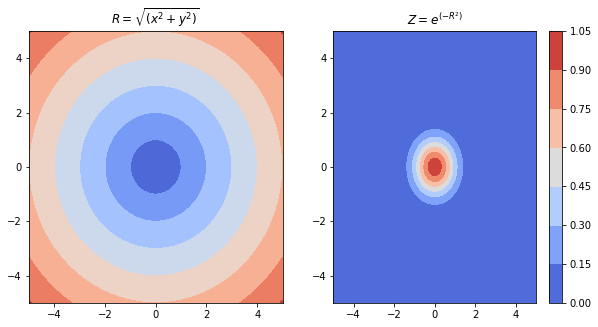

In [6]:
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    
    X, Y = np.meshgrid(  x,  y )
        
    fig, ax=plt.subplots(1, 2, figsize=(10,5))
        
    R = np.sqrt(X**2+Y**2)
    Z = f(R)
    
    ax[0].contourf(X, Y, R, cmap=cm.coolwarm)
    ax[0].set_title("${R=\sqrt{(x^2+y^2)}}$")

    bar=ax[1].contourf(X, Y, Z, cmap=cm.coolwarm)
    ax[1].set_title("${Z = {e^{(-R^2)}}}$")
    
    plt.colorbar(bar)   

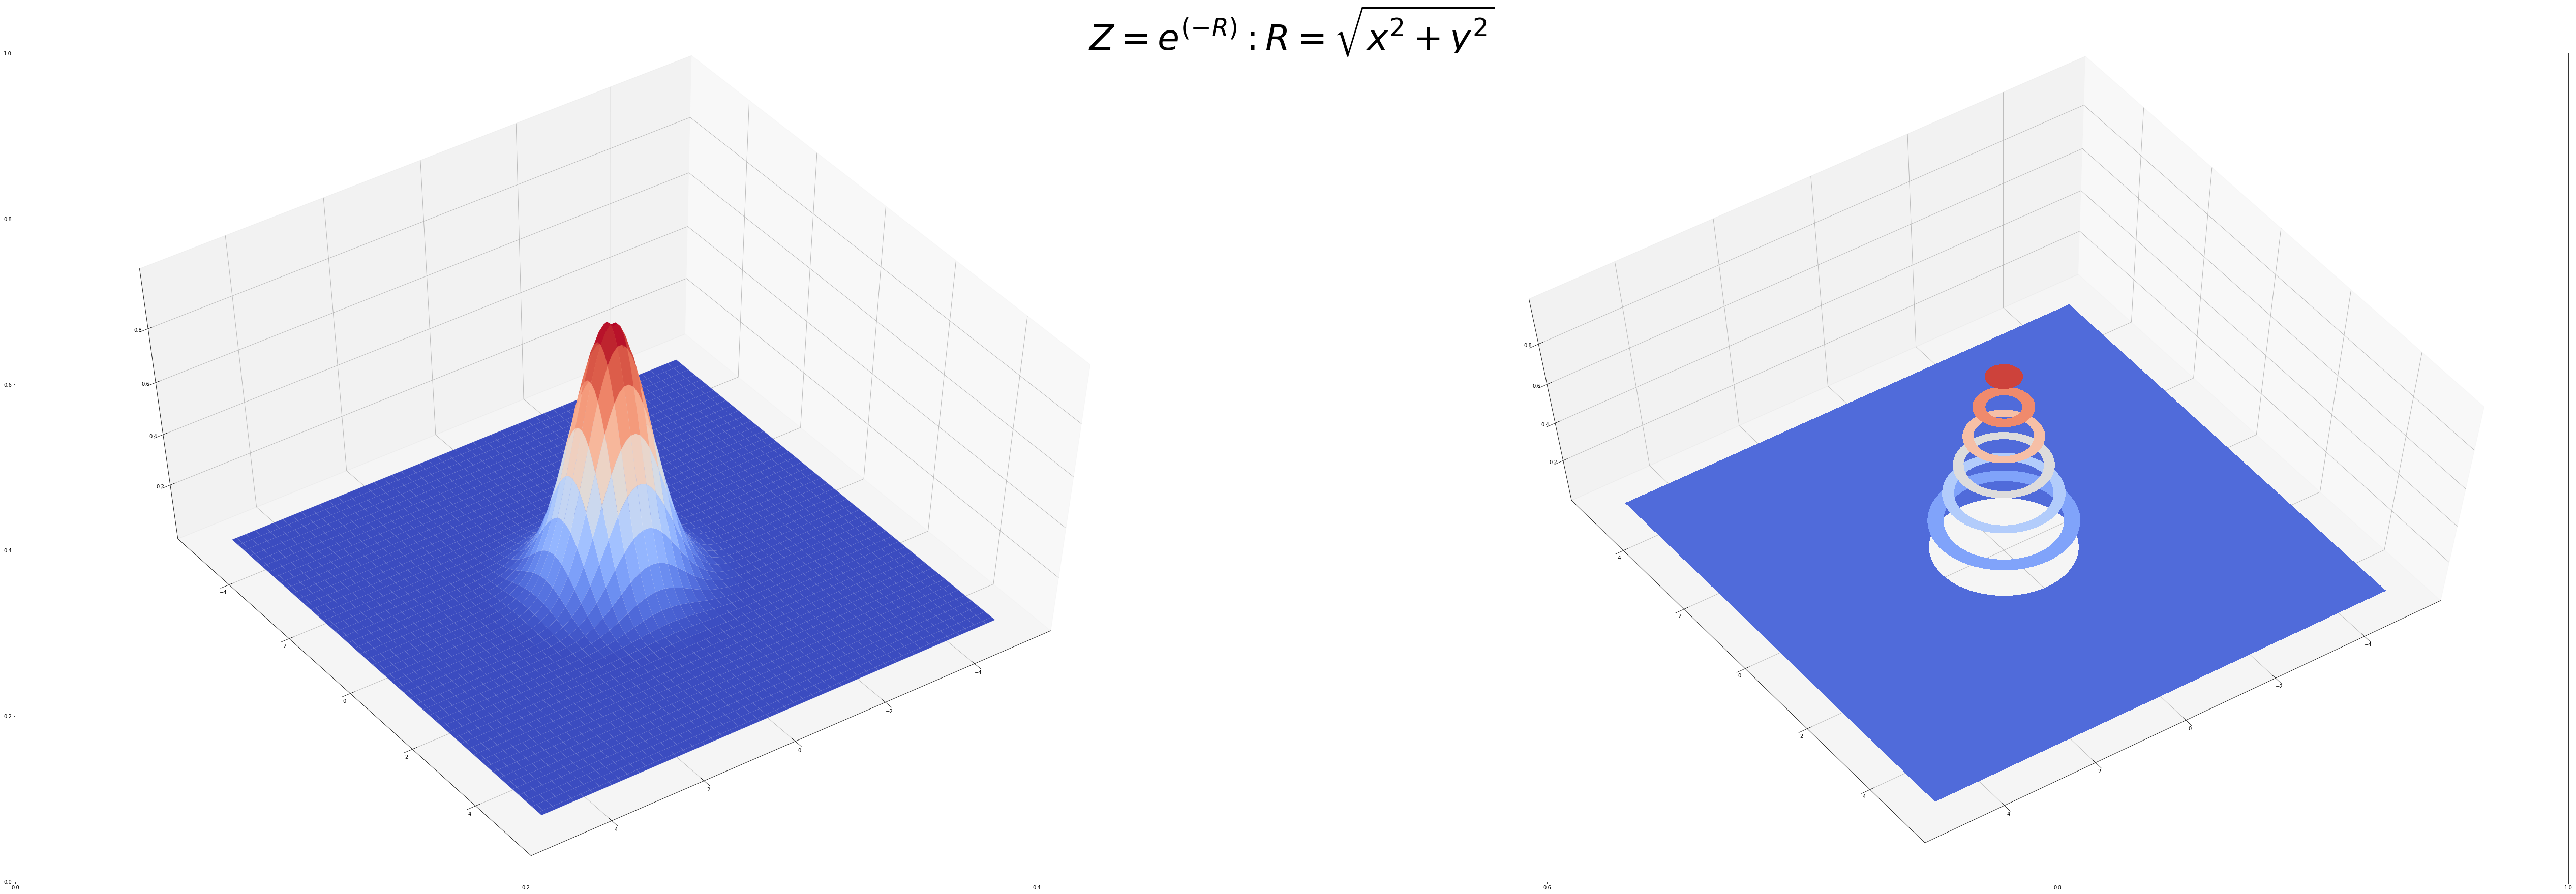

In [7]:
fig, ax = plt.subplots(figsize=(90,30))

ax.set_title("${Z = {e^{(-R)}}: R = \sqrt{x^2+y^2}}$", fontsize = 70 )

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.view_init(55, 55)  

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contourf(X, Y, Z, cmap=cm.coolwarm)
ax.view_init(65, 55)  
